In [25]:
import numpy as np
import os
import random
import cv2
import dlib
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [26]:
# Load the pre-trained face detector and shape predictor models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [27]:
# Function to detect landmarks
def detect_landmarks(image_path):
    # Load an image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    for face in faces:
        # Get the landmarks/parts for the face
        landmarks = predictor(gray, face)
        
        # Loop over the landmarks and draw them on the image
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

    # Convert image to RGB (for displaying with matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

In [28]:
def plot_random_landmarks(n):
    # List all subfolders in the VGGFace2_Small directory
    base_dir = 'VGGFace2_Small'
    subfolders = [os.path.join(base_dir, subfolder) for subfolder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, subfolder))]

    # Randomly select n images
    selected_images = []
    for _ in range(n):
        subfolder = random.choice(subfolders)
        images = [os.path.join(subfolder, img) for img in os.listdir(subfolder) if img.endswith('.jpg')]
        selected_images.append(random.choice(images))

    # Plot the landmarks for each selected image
    for image_path in selected_images:
        landmarked_image = detect_landmarks(image_path)
        plt.imshow(landmarked_image)
        plt.axis('off')
        plt.show()

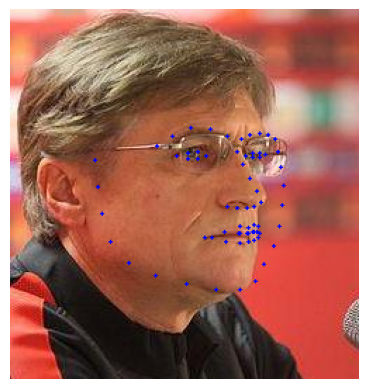

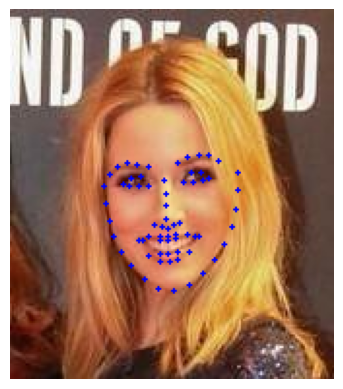

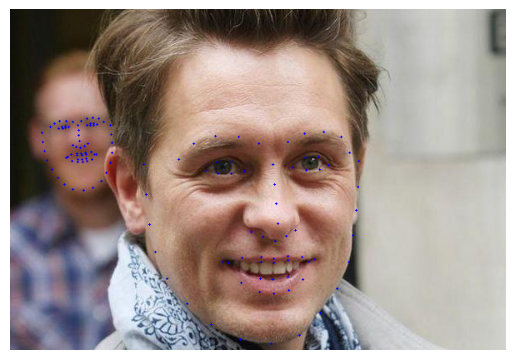

In [29]:
plot_random_landmarks(3)

In [30]:
# Function that returns the landmarks for a given image

def get_landmarks(image_path):
    # Load an image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Get the landmarks for the first face
    landmarks = predictor(gray, faces[0])

    # Extract the (x, y) coordinates of the landmarks
    x_coords = [landmarks.part(n).x for n in range(68)]
    y_coords = [landmarks.part(n).y for n in range(68)]

    return x_coords, y_coords

In [ ]:
def save_landmarks_to_csv(folder_path, csv_path):
    # List all images in the specified directory
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Open a CSV file to write the landmarks
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        header = ['image_path'] + [f'x_{i}' for i in range(68)] + [f'y_{i}' for i in range(68)]
        writer.writerow(header)

        # Iterate over all images
        for image_path in images:
            try:
                x_coords, y_coords = get_landmarks(image_path)
                row = [image_path] + x_coords + y_coords
                writer.writerow(row)
            except IndexError:
                print(f"No face detected in {image_path}")

# Example usage
save_landmarks_to_csv('VGGFace2_Small/n000001', 'landmarks_test.csv')


No face detected in VGGFace2_Small/n000001/0129_01.jpg
No face detected in VGGFace2_Small/n000001/0380_01.jpg
No face detected in VGGFace2_Small/n000001/0058_01.jpg
No face detected in VGGFace2_Small/n000001/0406_02.jpg
No face detected in VGGFace2_Small/n000001/0302_03.jpg
No face detected in VGGFace2_Small/n000001/0310_01.jpg
No face detected in VGGFace2_Small/n000001/0091_01.jpg
No face detected in VGGFace2_Small/n000001/0191_01.jpg
No face detected in VGGFace2_Small/n000001/0249_01.jpg
No face detected in VGGFace2_Small/n000001/0334_01.jpg
No face detected in VGGFace2_Small/n000001/0312_01.jpg
No face detected in VGGFace2_Small/n000001/0271_01.jpg
No face detected in VGGFace2_Small/n000001/0467_01.jpg
No face detected in VGGFace2_Small/n000001/0382_03.jpg
No face detected in VGGFace2_Small/n000001/0355_01.jpg
No face detected in VGGFace2_Small/n000001/0255_01.jpg
No face detected in VGGFace2_Small/n000001/0224_01.jpg
No face detected in VGGFace2_Small/n000001/0193_01.jpg
No face de

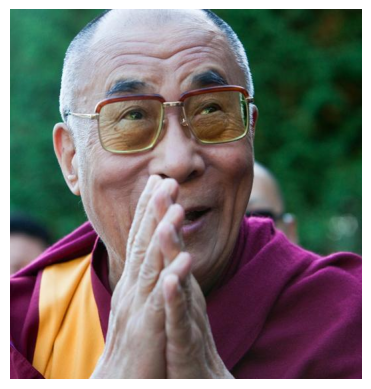

In [34]:
# Read the CSV file into a DataFrame
df_landmarks = pd.read_csv('landmarks.csv')

# List all images in the specified directory
folder_path = 'VGGFace2_Small/n000001'
all_images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Find images that are not in the DataFrame
images_no_face = [img for img in all_images if img not in df_landmarks['image_path'].values]

# plot the first 5 images where no face was detected
for image_path in images_no_face[:1]:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()